In [1]:
try:
  import pytorch_lightning as pl
except: 
  !pip install pytorch-lightning
  import pytorch_lightning as pl
    
try:
    from Bio import SeqIO
except:
    !pip install biopython
    from Bio import SeqIO

# Preprocessing

In [2]:
# Options
run_preprocessing = False

import os

# Download repo if notebook is taken out of context (e.g. by colab)
if not os.path.exists('models'):
    !git clone https://github.com/MachineLearningLifeScience/What-is-a-meaningful-representation-of-protein-sequences tmp_clone
    !mv tmp_clone/* .
    !rm -rf tmp_clone

if run_preprocessing:

    !pip install bioservices
    
    import scripts.blat_class_A1A2_preprocessing

    # Run preprocessing script
    scripts.blat_class_A1A2_preprocessing.process_data(os.getcwd())
else:
    # Retrieve ready-made files
    if not os.path.exists('BLAT_ECOLX_1_b0.5_labeled.fasta'):
        !wget https://sid.erda.dk/share_redirect/a5PTfl88w0/BLAT_ECOLX_1_b0.5_labeled.fasta
    if not os.path.exists('BLAT_ECOLX_alignment_clustalo_maxalign.fasta'):
        !wget https://sid.erda.dk/share_redirect/a5PTfl88w0/BLAT_ECOLX_alignment_clustalo_maxalign.fasta
        
# Check that files exist
assert os.path.exists('BLAT_ECOLX_1_b0.5_labeled.fasta')
assert os.path.exists('BLAT_ECOLX_alignment_clustalo_maxalign.fasta')

In [3]:
queries = {'A1': 
           {'TEM-1': "MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW",
            'SHV-1': "MRYIRLCIISLLATLPLAVHASPQPLEQIKLSESQLSGRVGMIEMDLASGRTLTAWRADERFPMMSTFKVVLCGAVLARVDAGDEQLERKIHYRQQDLVDYSPVSEKHLADGMTVGELCAAAITMSDNSAANLLLATVGGPAGLTAFLRQIGDNVTRLDRWETELNEALPGDARDTTTPASMAATLRKLLTSQRLSARSQRQLLQWMVDDRVAGPLIRSVLPAGWFIADKTGAGERGARGIVALLGPNNKAERIVVIYLRDTPASMAERNQQIAGIGAALIEHWQR",
            'PSE-1': "MKFLLAFSLLIPSVVFASSSKFQQVEQDVKAIEVSLSARIGVSVLDTQNGEYWDYNGNQRFPLTSTFKTIACAKLLYDAEQGKVNPNSTVEIKKADLVTYSPVIEKQVGQAITLDDACFATMTTSDNTAANIILSAVGGPKGVTDFLRQIGDKETRLDRIEPDLNEGKLGDLRDTTTPKAIASTLNKFLFGSALSEMNQKKLESWMVNNQVTGNLLRSVLPAGWNIADRSGAGGFGARSITAVVWSEHQAPIIVSIYLAQTQASMAERNDAIVKIGHSIFDVYTSQSR",
            'RTG-2': "MNVRKHKASFFSVVITFLCLTLSLNANATDSVLEAVTNAETELGARIGLAVHDLETGKRWEHKSNERFPLSSTFKTLACANVLQRVDLGKERIDRVVRFSESNLVTYSPVTEKHVGKKGMSLAELCQATLSTSDNSAANFILQAIGGPKALTKFLRSIGDDTTRLDRWETELNEAVPGDKRDTTTPIAMVTTLEKLLIDETLSIKSRQQLESWLKGNEVGDALFRKGVPSDWIVADRTGAGGYGSRAITAVMWPPNRKPIVAALYITETDASFEERNAVIAKIGEQIAKTVLMENSRN",
            'CumA' : "MTMFKTTFRQTATIAVSLISLLVSPMLWANTNNTIEEQLSTLEKYSQGRLGVALINTEDNSQITYRGEERFAMASTSKVMAVAAVLKESEKQAGLLDKNITIKKSDLVAYSPITEKHLVTGMSLAQLSAATLQYSDNTAMNKILDYLGGPAKVTQFARSINDVTYRLDRKEPELNTAIHGDPRDTTSPIAMAKSLQALTLGDALGQSQRQQLVTWLKGNTTGDHSIKAGLPKHWIVGDKTGSGDYGTTNDIAVIWPKNHAPLILVVYFTQQEQDAKYRKDIIVKATEIVTKEISNSPQTK",
            'OXY-1': "MLKSSWRKTALMAAAAVPLLLASGSLWASADAIQQKLADLEKRSGGRLGVALINTADDSQTLYRGDERFAMCSTGKVMAAAAVLKQSESNPEVVNKRLEIKKSDLVVWSPITEKHLQSGMTLAELSAAALQYSDNTAMNKMISYLGGPEKVTAFAQSIGDVTFRLDRTEPALNSAIPGDKRDTTTPLAMAESLRKLTLGNALGEQQRAQLVTWLKGNTTGGQSIRAGLPASWAVGDKTGAGDYGTTNDIAVIWPENHAPLVLVTYFTQPQQDAKSRKEVLAAAAKIVTEGL",
            'KLUA-1': "MMTQSIRRSMLTVMATLPLLFSSATLHAQANSVQQQLEALEKSSGGRLGVALINTADNSQILYRADERFAMCSTSKVMAAAAVLKQSESDKHLLNQRVEIKKSDLVNYNPIAEKHVNGTMTLAELGAAALQYSDNTAMNKLIAHLGGPDKVTAFARSLGDETFRLDRTEPTLNTAIPGDPRDTTTPLAMAQTLKNLTLGKALAETQRAQLVTWLKGNTTGSASIRAGLPKSWVVGDKTGSGDYGTTNDIAIIWPENHAPLVLVTYFTQPEQKAESRRDVLAAAAKIVTHGF",
            'CTX-M-1': "MVKKSLRQFTLMATATVTLLLGSVPLYAQTADVQQKLAELERQSGGRLGVALINTADNSQILYRADERFAMCSTSKVMAVAAVLKKSESEPNLLNQRVEIKKSDLVNYNPIAEKHVDGTMSLAELSAAALQYSDNVAMNKLISHVGGPASVTAFARQLGDETFRLDRTEPTLNTAIPGDPRDTTSPRAMAQTLRNLTLGKALGDSQRAQLVTWMKGNTTGAASIQAGLPASWVVGDKTGSGDYGTTNDIAVIWPKDRAPLILVTYFTQPQPKAESRRDVLASAAKIVTNGL",
            'NMCA': "MSLNVKQSRIAILFSSCLISISFFSQANTKGIDEIKNLETDFNGRIGVYALDTGSGKSFSYRANERFPLCSSFKGFLAAAVLKGSQDNRLNLNQIVNYNTRSLEFHSPITTKYKDNGMSLGDMAAAALQYSDNGATNIILERYIGGPEGMTKFMRSIGDEDFRLDRWELDLNTAIPGDERDTSTPAAVAKSLKTLALGNILSEHEKETYQTWLKGNTTGAARIRASVPSDWVVGDKTGSCGAYGTANDYAVVWPKNRAPLIISVYTTKNEKEAKHEDKVIAEASRIAIDNLK",
            'SME-1': "MSNKVNFKTASFLFSVCLALSAFNAHANKSDAAAKQIKKLEEDFDGRIGVFAIDTGSGNTFGYRSDERFPLCSSFKGFLAAAVLERVQQKKLDINQKVKYESRDLEYHSPITTKYKGSGMTLGDMASAALQYSDNGATNIIMERFLGGPEGMTKFMRSIGDNEFRLDRWELELNTAIPGDKRDTSTPKAVANSLNKLALGNVLNAKVKAIYQNWLKGNTTGDARIRASVPADWVVGDKTGSCGAYGTANDYAVIWPKNRAPLIVSIYTTRKSKDDKHSDKTIAEASRIAIQAID",
            'KPC-2': "MSLYRRLVLLSCLSWPLAGFSATALTNLVAEPFAKLEQDFGGSIGVYAMDTGSGATVSYRAEERFPLCSSFKGFLAAAVLARSQQQAGLLDTPIRYGKNALVPWSPISEKYLTTGMTVAELSAAAVQYSDNAAANLLLKELGGPAGLTAFMRSIGDTTFRLDRWELELNSAIPGDARDTSSPRAVTESLQKLTLGSALAAPQRQQFVDWLKGNTTGNHRIRAAVPADWAVGDKTGTCGVYGTANDYAVVWPTGRAPIVLAVYTRAPNKDDKHSEAVIAAAARLALEGLGVNGQ",
            'GES-1': "MRFIHALLLAGIAHSAYASEKLTFKTDLEKLEREKAAQIGVAIVDPQGEIVAGHRMAQRFAMCSTFKFPLAALVFERIDSGTERGDRKLSYGPDMIVEWSPATERFLASGHMTVLEAAQAAVQLSDNGATNLLLREIGGPAAMTQYFRKIGDSVSRLDRKEPEMGDNTPGDLRDTTTPIAMARTVAKVLYGGALTSTSTHTIERWLIGNQTGDATLRAGFPKDWVVGEKTGTCANGGRNDIGFFKAQERDYAVAVYTTAPKLSAVERDELVASVGQVITQLILSTDK",
            'BEL-1': "MKLLLYPLLLFLVIPAFAQADFEHAISDLEAHNQAKIGVALVSENGNLIQGYRANERFAMCSTFKLPLAALVLSRIDAGEENPERKLHYDSAFLEEYAPAAKRYVATGYMTVTEAIQSALQLSDNAAANLLLKEVGGPPLLTKYFRSLGDKVSRLDRIEPTLNTNTPGDERDTTTPMSMAQTVSKLIFGDTLTYKSKGQLRRLLIGNQTGDKTIRAGLPDSWVTGDKTGSCANGGRNDVAFFITTAGKKYVLSVYTNAPELQGEERALLIASVAKLARQYVVH",
            'BPS-1': "MNHSPLRRSLLVAAISTPLIGACAPLRGQAKNVAAAERQLRELESTFDGRLGFVALDTATGARIAHRGDERFPFCSTSKMMLCAAVLARSAGEPALLQRRIAYAKGDLIRYSPITEQHVGAGMSVAELCAATLQYSDNTAANLLIALLGGPQAVTAYARSIGDATFRLDRREPELNTALPGDERDTTTPAAMAASVHRLLVGDALGAAQRAQLNAWMLGNKTGDARIRAGVPADWRVADKTGTGDYGTANDIGVAYPPNRAPIVFIVYTTMRNPNAQARDDVIASATRIAARAFA"
           },
           'A2':
           {'PER-1': "MNVIIKAVVTASTLLMVSFSSFETSAQSPLLKEQIESIVIGKKATVGVAVWGPDDLEPLLINPFEKFPMQSVFKLHLAMLVLHQVDQGKLDLNQTVIVNRAKVLQNTWAPIMKAYQGDEFSVPVQQLLQYSVSHSDNVACDLLFELVGGPAALHDYIQSMGIKETAVVANEAQMHADDQVQYQNWTSMKGAAEILKKFEQKTQLSETSQALLWKWMVETTTGPERLKGLLPAGTVVAHKTGTSGIKAGKTAATNDLGIILLPDGRPLLVAVFVKDSAESSRTNEAIIAQVAQTAYQFELKKLSALSPN",
            'CEF-1': "MKIVKRILLVLLSLFFTIVYSNAQTDNLTLKIENVLKAKNARIGVAIFNSNEKDTLKINNDFHFPMQSVMKFPIALAVLSEIDKGNLSFEQKIEITPQDLLPKTWSPIKEEFPNGTTLTIEQILNYTVSESDNIGCDILLKLIGGTDSVQKFLNANHFTDISIKANEEQMHKDWNTQYQNWATPTAMNKLLIDTYNNKNQLLSKKSYDFIWKIMRETTTGSNRLKGQLPKNTIVAHKTGTSGINNGIAAATNDVGVITLPNGQLIFISVFVAESKETSEINEKIISDIAKITWNYYLNK",
            'VEB-1': "MKIVKRILLVLLSLFFTIVYSNAQTDNLTLKIENVLKAKNARIGVAIFNSNEKDTLKINNDFHFPMQSVMKFPIALAVLSEIDKGNLSFEQKIEITPQDLLPKTWSPIKEEFPNGTTLTIEQILNYTVSESDNIGCDILLKLIGGTDSVQKFLNANHFTDISIKANEEQMHKDWNTQYQNWATPTAMNKLLIDTYNNKNQLLSKKSYDFIWKIMRETTTGSNRLKGQLPKNTIVAHKTGTSGINNGIAAATNDVGVITLPNGQLIFISVFVAESKETSEINEKIISDIAKITWNYYLNK",
            'TLA-2': "MNIKYFKFAEKFILLVLIMSFSSLAFCKSDDSLEQRINSIISGKKASVGVAVAGIEDNFSLSINGKKNFPMMSVYKLHIVLAVLNKVDGGSLKLDEKIPLNKKDLHPGTWSPLRDKYPNGGVSIPLSEIIEYTITQSDNNGCDILIALAGGTEAVKRYIISKGISDFDIRATEKECHESWNVQYSNWSTPVSAVALLKKFNDRKILSSVSTEYLMNVMIHTSTGNKRIKGLIPPSADVAHKTGTSGIRNGITPGTNDIGIVTLPNGKHFAIAVFVSDSRENNAANERIIAEISKAAWDYFVKMN",
            'CIA-1': "MKKITFLLLMVSAFATAQKSVLDEKISAVIKDKKATVGVSVLGFENAFKYSKNGDKKLPLLSVFKFHLACAVLDMADKGKFSTDQKFLIKKSDLLENTWSPLREKFPEGNIELSLGEIITYTVAQSDNNTCDFLLRLIGGPQVVQHFMDSKGAKDLQIKYNEDDMHRDWKNQYGNESSTNATVSLLKKFYDGKLLTKKSTDFLMQIMLGTTTGTNKIVEQLPKSTPVAHKTGSSGKPDNILTVAENDMGIITLPNGKHYAIAVFVSNSTETEKVNTRMVSDISKIVWDNFNK",
            'CGA-1': "LAQTSLLEQKINSILKNKKATVGVSVLGFENGFKYDKNGDKKLPMQSVFKFHIAAAVLNAVDQGKLSLHQKIMLNPSNLLENTWSPLRDKYPAGNVEIPLSEVIEYTVAKSDNNGCDILLRLLGGTQVVQKFMDSKGVKGFQIKYNEEDMHKDWNVQYENYSTTKSAADVLKKLYDGKLLSKKSTDYLMKVMLSTSTGLNKMVEQLPKNTPVARKTGASGKNNAGLTGAENEIGIVTLPNGKHYA",
            'CME-1': "MKRISIIFLFFSLFVFSQHSKPELLEKINTITKGKKATVAVSVLGIENDFQFSNANGNLKMPMLSVFKFHIALAVLNQVDKGNLTLDQKILIKKSDLLENTWSPLREKYPDGNVELPLSEIITYTVAQSDNNGCDILLRLIGGTKTVQKLMDVNGIKNFQIKYNEEEMHKNDVKTLYANYTTTASMVKTLKAFYKGMFLSKRSTIFLMDIMTKTNTGMSKLPGLLPKVRMARKTGSSGKMKNGLTIAENDSGIVTLANGKHYAIAVFVKDSMESEEVNCGMIAQVSKIVWDALNKKINPNNKTERFVNSLIKK",
            'CSP-1': "MKKLTQMKKLTQMKKYFSFCLLGIFIFCFSQQNLKRDITKIIQGKNALVAVSVMNSKGKTEVNINGNKKVPMLSVFKFHIALAVLDLVDRGILDLEQNIFVKKSELLENTWSPIRDKYPNGNVNIPLREIIEHTVSQSDNNGCDILLRLIGGVDTVQKFIESKGIKDFAIKYNEEEMNKNGKSIYSNYTTANASSRLLQKFYNGEIISESSRDFLFRIMYETSTGADRLISLLPPDVIVAHKTGTSGIVSGIQAATNDVGIIILPDDEYYTISVFVINSKENTSTNEKIIADISKTVWDYYFQNK",
            'SPU-1': "MKKYFSFCLLGIFIFCFSQQNLKRDITKIIQGKNALVAVSVMNSKGKTEVNINGNKKVPMLSVFKFHIALAVLDLVDRGILDLEQNIFVKKSELLENTWSPIRDKYPNGNVNIPLREIIEHTVSQSDNNGCDILLRLIGGVDTVQKFIESKGIKDFAIKYNEEEMNKNGKSIYSNYTTANASSRLLQKFYNGEIISESSRDFLFRIMYETSTGADRLISLLPPDVIVAHKTGTSGIVSGIQAATNDVGIIILPDDEYYTISVFVINSKENTSTNEKIIADISKTVWDYYFQNK",
            'TLA-1': "MTVPISIIFWGNIMKKHLVVIAFCVLFASASAFAAKGTDSLKSSIEKYLKDKKAKVGVAVLGIEDNFKLNVNEKHHYPMQSTYKFHLALAVLDKLDKENISIDKKLFVKKSELLPNTWSPLRDKYPDGNVDLSISEILKATVSRSDNNGCDILFRFVGGTNKVHNFISKLGVKNISIKATEEEMHKAWNVQYTNWTTPDATVQLLKKFYKNEILSKNSYDYLLNTMIETTTGPKRLKGLLPDGTVVAHKTGSSDTNDKGITAATNDIGIITLPNGKHFAIAVYVSDSSEKSDVNEKIIAEICKSVWDYLVKDGK",
            'CblA': "MKAYFIAILTLFTCIATVVRAQQMSELENRIDSLLNGKKATVGIAVWTDKGDMLRYNDHVHFPLLSVFKFHVALAVLDKMDKQSISLDSIVSIKASQMPPNTYSPLRKKFPDQDFTITLRELMQYSISQSDNNACDILIEYAGGIKHINDYIHRLSIDSFNLSETEDGMHSSFEAVYRNWSTPSAMVRLLRTADEKELFSNKELKDFLWQTMIDTETGANKLKGMLPAKTVVGHKTGSSDRNADGMKTADNDAGLVILPDGRKYYIAAFVMDSYETDEDNANIIARISRMVYDAMR",
            'CfxA': "MEKNRKKQIVVLSIALVCIFILVFSLFHKSATKDSANPPLTNVLTDSISQIVSACPGEIGVAVIVNNRDTVKVNNKSVYPMMSVFKVHQALALCNDFDNKGISLDTLVNINRDKLDPKTWSPMLKDYSGPVISLTVRDLLRYTLTQSDNNASNLMFKDMVNVAQTDSFIATLIPRSSFQIAYTEEEMSADHNKAYSNYTSPLGAAMLMNRLFTEGLIDDEKQSFIKNTLKECKTGVDRIAAPLLDKEGVVIAHKTGSGYVNENGVLAAHNDVAYICLPNNISYTLAVFVKDFKGNKSQASQYVAHISAVVYSLLMQTSVKS",
            'CepA': "MQKRLIHLSIIFFLLCPALVVAQNSPLETQLKKAIEGKKAEIGIAVIIDGQDTITVNNDIHYPMMSVFKFHQALALADYMHHQKQPLKTRLLIKKSDLKPDTYSPLRETYPQGGIEMSIADLLKYTLQQSDNNACDILFNYQGGPDAVNKYLHSLGIRECAVIHTENDMHENLEFCYQNWTTPLAAAKLLEIFRNENLFDKEYKNFIYQTMVECQTGQDRLIAPLLDKKVTMGHKTGTGDRNAKGQQIGCNDIGFILLPDGHVYSIAVFVKDSEADNRENSEIIAEISRIVYEYVTQQID"
           }
          }


# Align single sequences to alignment using clustalo
#from scripts.align_seq_to_profile import align

import os
import tempfile
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import subprocess
from io import StringIO

def align(seqs, profile_filename, output_filename):

    records = []
    for name,seq in seqs:
        records.append(
            SeqRecord(Seq(seq),
                      id=name,
                      description=""))
    
    with tempfile.NamedTemporaryFile('w') as fp:
        SeqIO.write(records, fp, "fasta")
        fp.seek(0)

        command = 'clustalo --profile1={} --in={} --out={} --force'.format(profile_filename, fp.name, output_filename)
        os.system(command)

do_alignment = False

if do_alignment:
    
    aligned_seqs = []
    for alignment_filename in ['BLAT_ECOLX_1_b0.5_labeled.fasta', 'BLAT_ECOLX_alignment_clustalo_maxalign.fasta']:

        aligned_seqs.append({})
        for blat_class in queries:

            aligned_seqs[-1][blat_class] = {}

            with tempfile.NamedTemporaryFile('w') as fp:
                align(queries[blat_class].items(), 
                      alignment_filename,
                      fp.name)

                records_orig = np.array([[aa1_to_index[aa] for aa in str(record.seq).upper().replace('.','-')] \
                                         for record in SeqIO.parse(alignment_filename, "fasta")])
                records = list(SeqIO.parse(fp.name, "fasta"))
                records_queries = np.array([[aa1_to_index[aa] for aa in str(record.seq).upper()] \
                                            for record in records[:len(queries[blat_class])]])
                records_profile = np.array([[aa1_to_index[aa] for aa in str(record.seq).upper()] \
                                            for record in records[len(queries[blat_class]):]])

                # Remove gaps introduced in profile
                index_orig = 0
                index = 0
                remove_indices = []
                while index < records_profile.shape[1]:
                    if index_orig < records_orig.shape[1] and (records_profile[:,index] == records_orig[:,index_orig]).all():
                        index += 1
                        index_orig += 1
                        #print('index', index, "match", index_orig)
                    else:
                        remove_indices.append(index)
                        index += 1
                        #print('index', index, "gap", index_orig)
                for remove_index in remove_indices[::-1]:
                    records_queries = np.delete(records_queries, remove_index, axis=1)

                records = []
                for i,(name,query) in enumerate(queries[blat_class].items()):
                    seq = "".join([aa1[aa] for aa in records_queries[i]])
                    aligned_seqs[-1][blat_class] = seq
                    records.append(
                        SeqRecord(Seq(seq),
                                  id=name,
                                  description=""))
                with open(alignment_filename.replace('.fasta', '_{}.fasta'.format(blat_class)), "w") as output_handle:
                    SeqIO.write(records, output_handle, "fasta")
                
else:
    
    if not os.path.exists('BLAT_ECOLX_1_b0.5_labeled_A1.fasta'):
        !wget https://sid.erda.dk/share_redirect/a5PTfl88w0/BLAT_ECOLX_1_b0.5_labeled_A1.fasta
    if not os.path.exists('BLAT_ECOLX_1_b0.5_labeled_A2.fasta'):
        !wget https://sid.erda.dk/share_redirect/a5PTfl88w0/BLAT_ECOLX_1_b0.5_labeled_A2.fasta
    if not os.path.exists('BLAT_ECOLX_alignment_clustalo_maxalign_A1.fasta'):
        !wget https://sid.erda.dk/share_redirect/a5PTfl88w0/BLAT_ECOLX_alignment_clustalo_maxalign_A1.fasta
    if not os.path.exists('BLAT_ECOLX_alignment_clustalo_maxalign_A2.fasta'):
        !wget https://sid.erda.dk/share_redirect/a5PTfl88w0/BLAT_ECOLX_alignment_clustalo_maxalign_A2.fasta

aligned_seqs = []
for alignment_filename in ['BLAT_ECOLX_1_b0.5_labeled.fasta', 'BLAT_ECOLX_alignment_clustalo_maxalign.fasta']:
    aligned_seqs.append({})
    for blat_class in queries:
        aligned_seqs[-1][blat_class] = {}
        for record in SeqIO.parse(alignment_filename.replace('.fasta', '_{}.fasta'.format(blat_class)), "fasta"):
            aligned_seqs[-1][blat_class][record.id] = str(record.seq)            

# Training

In [4]:
import numpy as np
import pytorch_lightning as pl
import torch
import torch.nn.functional as F
from Bio import SeqIO

from models.vae_geometric import VAE, get_hparams, aa1_to_index, aa1

def get_data(data_filename, test_filenames, calc_weights=True, add_test_to_train_set=True):
    ids = []
    seqs = []
    for record in SeqIO.parse(data_filename, "fasta"):
        ids.append(record.id)
        seqs.append(np.array([aa1_to_index[aa] for aa in str(record.seq).upper().replace('.', '-')]))
        
    if add_test_to_train_set:
        for query_filename in test_filenames:
            for record in SeqIO.parse(query_filename, "fasta"):
                ids.append(record.id)
                seqs.append(np.array([aa1_to_index[aa] for aa in str(record.seq).upper().replace('.', '-')]))
        
    seqs = torch.from_numpy(np.vstack(seqs))

    weights = None
    if calc_weights is not False:
        one_hot = F.one_hot(seqs.long()).to('cuda' if torch.cuda.is_available() else 'cpu')
        one_hot[seqs>19] = 0
        flat_one_hot = one_hot.flatten(1)

        weights = []
        weight_batch_size = 1000
        flat_one_hot = flat_one_hot.float()
        for i in range(seqs.size(0) // weight_batch_size + 1):
            x = flat_one_hot[i * weight_batch_size : (i + 1) * weight_batch_size]
            similarities = torch.mm(x, flat_one_hot.T)
            lengths = (seqs[i * weight_batch_size : (i + 1) * weight_batch_size] <=19).sum(1).unsqueeze(-1).to('cuda' if torch.cuda.is_available() else 'cpu')
            w = 1.0 / (similarities / lengths).gt(0.8).sum(1).float()
            weights.append(w)

        weights = torch.cat(weights)
        neff = weights.sum()

    return seqs, weights

data_query_centric, weights_query_centric = get_data('BLAT_ECOLX_1_b0.5_labeled.fasta', 
                                                     test_filenames=['BLAT_ECOLX_1_b0.5_labeled_A1.fasta', 'BLAT_ECOLX_1_b0.5_labeled_A2.fasta'],
                                                     calc_weights=True,
                                                     add_test_to_train_set=True)
data_realigned, weights_realigned = get_data('BLAT_ECOLX_alignment_clustalo_maxalign.fasta', 
                                             test_filenames=['BLAT_ECOLX_alignment_clustalo_maxalign_A1.fasta', 'BLAT_ECOLX_alignment_clustalo_maxalign_A2.fasta'],
                                             calc_weights=True,
                                             add_test_to_train_set=True)

7871
6668


In [5]:
import time

def train_or_retrieve_model(name, data, weights, train_model, post_train_encoder=False):
    
    cmd_args = []
    if train_model:
        cmd_args += ['-gpu', '1' if torch.cuda.is_available() else '']
    else:
        cmd_args += ['-load_from', name+'.ckpt', '-gpu', '1' if torch.cuda.is_available() else '']
    hparams = get_hparams(cmd_args)

    pl.seed_everything(hparams.seed)

    perm = np.random.permutation(data.shape[0])
    
    if hparams.load_from!='':
        
        if not os.path.exists(hparams.load_from):
            filename = os.path.join('https://sid.erda.dk/share_redirect/a5PTfl88w0/', hparams.load_from)
            !wget $filename
        
        print('Loading from checkpoint!')
        model = VAE.load_from_checkpoint(checkpoint_path=hparams.load_from, data=data, perm=perm, weights=weights)

        # for some reason these where not correctly saved in the checkpoint
        model.switch = True
        
        # Trigger retraining of distnet, since this does not seem to be saved properly in checkpoint
        model.distnet.initialized = False
        
        # Model fit specific parameter setting the temperature of the uncertainty
        model.distnet.trans.beta.data = torch.tensor([-4.1])
        
    else:
        print('Training model!')
        model = VAE(data=data, weights=weights, perm=perm, hparams=hparams)
        trainer = pl.Trainer(gpus=1 if hparams.gpu else 0,
                             max_epochs=hparams.epochs)
        trainer.fit(model)
        
        trainer.save_checkpoint(name+'_{}.ckpt'.format(time.strftime("%Y%m%d")))

    if post_train_encoder:
        model._train_encoder_only=True
        trainer = pl.Trainer(gpus=1 if hparams.gpu else 0, max_epochs=20, logger=False)
        trainer.fit(model, model.train_dataloader())  # passing it along to make sure it is not cached

        trainer.save_checkpoint(name+'_posttrained_{}.ckpt'.format(time.strftime("%Y%m%d")))

    return model

In [7]:
# Options
train_models = False

model_qc   = train_or_retrieve_model('model_BLAT_ECOLX_query_centric_posttrained_20210422', 
                                     data_query_centric,
                                     weights=None,
                                     train_model=train_models, 
                                     post_train_encoder=False)
model_qc_r = train_or_retrieve_model('model_BLAT_ECOLX_query_centric_reweighted_posttrained_20210422', 
                                     data_query_centric,
                                     weights=weights_query_centric,
                                     train_model=train_models, 
                                     post_train_encoder=False)
model_ra   = train_or_retrieve_model('model_BLAT_ECOLX_realigned_posttrained_20210422', 
                                     data_realigned,
                                     weights=None,
                                     train_model=train_models, 
                                     post_train_encoder=False)
model_ra_r = train_or_retrieve_model('model_BLAT_ECOLX_realigned_reweighted_posttrained_20210425',
                                     data_realigned,
                                     weights=weights_realigned,
                                     train_model=train_models, 
                                     post_train_encoder=False)
models = [model_qc, model_qc_r, model_ra, model_ra_r]

Loading from checkpoint!
Loading from checkpoint!
Loading from checkpoint!
Loading from checkpoint!


# Alignment & embedding

In [8]:
embeddings = []
for model in models:
    embeddings.append([])
    batchsize = 16
    n_batch = int(np.ceil(model.data.shape[0] / batchsize))
    for b in range(n_batch):
        batch = model.data[b*batchsize:(b+1)*batchsize]
        zs = model.embedding(batch.long().to(model._device))
        embeddings[-1].append(zs.detach())
    embeddings[-1] = np.vstack(embeddings[-1])

In [9]:
from scripts.needleman_wunsch import needleman_wunsch_align

def calculate_marginal_x_dist(model):

    data = model.data

    x_dist_marginal = np.zeros([len(aa1_to_index), data.shape[-1]])
    x_dist_obs = 0

    batchsize = 16
    n_batch = int(np.ceil(data.shape[0] / batchsize))
    for b in range(n_batch):
        batch = data[b*batchsize:(b+1)*batchsize]
        zs = model.embedding(batch.long().to(model._device))
        x_dist_marginal += model.decode(zs, as_probs=True).sum(dim=0).detach().cpu().numpy()
        x_dist_obs += batchsize

    x_dist_marginal /= x_dist_obs
    x_dist_marginal = x_dist_marginal.transpose()
    x_dist_marginal = torch.from_numpy(x_dist_marginal).squeeze()
    
    return x_dist_marginal

def align(query, potentials, gaps):

    decoded = needleman_wunsch_align(potentials, gaps)  
    pred_x, pred_y, pred_states = zip(*decoded)

    aligned_query = query[np.array(pred_y)]
    aligned_query[np.array(pred_states)==0] = 22
    aligned_query = aligned_query[np.array(pred_states)!=2]

    # FIXME: This operation means the indices in pred_y are potentially shifted, which means they are not super useful.
    pred_y = np.array(pred_y)
    pred_y = pred_y[np.array(pred_states)!=2]

    assert len(pred_y) == len(aligned_query)

    return aligned_query, pred_y


def align_to_vae(model, query, initial_x_dist, iterations=10, verbose=False):

    x_dist = initial_x_dist.clone().detach()

    # Iterate until convergence: 
    # 1) Align to x_dist, 
    # 2) Encode query to get new z
    # 3) Get new x_dist from z
    for i in range(iterations):

        gap_score = -30
        gaps = torch.ones(2, x_dist.shape[0], len(query)).to(model._device)*gap_score

        match = torch.zeros(x_dist.shape[0], len(query)).to(model._device)
        for j, aa in enumerate(query):
            match[:,j] = x_dist[:,int(aa)].log()
            gaps[0,:,j] = x_dist[:, 22].log()

        aligned_query, idx_map = align(query, match, gaps)

        x = torch.nn.functional.one_hot(torch.from_numpy(np.array(aligned_query)).unsqueeze(0).to(model._device), 
                                  len(aa1_to_index))
        h = model.encoder(x.float().reshape(x.shape[0], -1))
        z = model.encoder_mu(h)
        z_s = model.encoder_scale(h)
        # z = model.embedding(torch.from_numpy(np.array(aligned_query)).unsqueeze(0).to(model._device))

        if verbose:
            print("z: ", z.detach().cpu().numpy())

        x_dist = model.decode(z, as_probs=True).detach().cpu().squeeze().permute(1,0)

    return aligned_query.detach(), z.detach(), z_s.detach(), x_dist.detach(), np.array(idx_map)

In [307]:
alignment_to_model = True    # We can align either to the model, or we can use pre-aligned sequences that were aligned using a multiple sequence alignment algorithm

results = {}
observables = ["z", "x_dist", "idx_map", "reconstruction acc.", "reconstruction acc. w. gaps", "gap fraction"]
for observable in observables:
    results[observable] = []

for model,aln_idx in zip(models, [0,0,1,1]):

    for observable in results.keys():
        results[observable].append({})    

    x_dist_marginal = None
    if alignment_to_model:
        x_dist_marginal = calculate_marginal_x_dist(model)
    
    for blat_class in queries:

        for observable in results.keys():
            results[observable][-1][blat_class] = []

        for query_name in queries[blat_class]:
            
            if alignment_to_model:
                unaligned_query = queries[blat_class][query_name]
                query_tensor = torch.from_numpy(np.array([aa1_to_index[aa] for aa in str(unaligned_query).upper()]))
                query_tensor = query_tensor[query_tensor != 22]
                query, z, z_s, x_dist, idx_map = align_to_vae(model, query_tensor, x_dist_marginal, iterations=50)
                # print(torch.nn.CrossEntropyLoss(reduction='none')(x_dist.unsqueeze(0).permute(0,2,1), aligned_query.unsqueeze(0)).sum())
                #print((x_dist.argmax(dim=-1) == aligned_query)[aligned_query!=aa1_to_index['-']].float().mean())
            else:
                query = aligned_seqs[aln_idx][blat_class][query_name]
                query_tensor = torch.from_numpy(np.array([aa1_to_index[aa] for aa in str(query).upper()])).unsqueeze(0)
                z = model.embedding(query_tensor.long().to(model._device)).detach().cpu().numpy()
                x_dist = model.decode(z, as_probs=True).detach().cpu().squeeze().permute(1,0).numpy()
                idx_map = None

            recon_gapped_acc = (x_dist.argmax(dim=-1) == query).float().mean()
            recon_acc = (x_dist.argmax(dim=-1) == query)[query!=aa1_to_index['-']].float().mean()
            gap_fraction = 1-(query!=aa1_to_index['-']).float().mean()

            print(query_name, z, recon_gapped_acc, recon_acc, gap_fraction)
            
            values = [z, x_dist, idx_map, recon_acc, recon_gapped_acc, gap_fraction]
            for idx, observable in enumerate(observables):
                results[observable][-1][blat_class].append(values[idx])

        for idx, observable in enumerate(results.keys()):
            results[observable][-1][blat_class] = np.vstack(results[observable][-1][blat_class])


TEM-1 tensor([[ 3.1568, -2.7987]]) tensor(1.) tensor(1.) tensor(0.0266)
SHV-1 tensor([[ 4.6059, -1.5903]]) tensor(1.) tensor(1.) tensor(0.0228)
PSE-1 tensor([[ 1.2949, -0.8568]]) tensor(0.9772) tensor(0.9805) tensor(0.0228)
RTG-2 tensor([[ 1.1853, -0.4887]]) tensor(0.6882) tensor(0.6784) tensor(0.0304)
CumA tensor([[-0.1540, -2.0235]]) tensor(0.7681) tensor(0.7645) tensor(0.0152)
OXY-1 tensor([[ 0.1232, -2.0536]]) tensor(0.9087) tensor(0.9070) tensor(0.0190)
KLUA-1 tensor([[ 0.2187, -3.0184]]) tensor(0.9886) tensor(0.9883) tensor(0.0228)
CTX-M-1 tensor([[ 0.1514, -4.4860]]) tensor(0.9848) tensor(0.9844) tensor(0.0266)
NMCA tensor([[1.8654, 1.6761]]) tensor(0.9392) tensor(0.9373) tensor(0.0304)
SME-1 tensor([[1.8033, 1.4432]]) tensor(0.7757) tensor(0.7677) tensor(0.0342)
KPC-2 tensor([[3.1711, 2.2693]]) tensor(0.9886) tensor(0.9882) tensor(0.0342)
GES-1 tensor([[ 0.1487, -0.4197]]) tensor(0.9886) tensor(0.9883) tensor(0.0266)
BEL-1 tensor([[ 0.3826, -0.2454]]) tensor(0.5779) tensor(0.57

SPU-1 tensor([[ 4.3869, -1.5785]]) tensor(0.9721) tensor(0.5893) tensor(0.9390)
TLA-1 tensor([[ 4.4186, -1.7675]]) tensor(0.9710) tensor(0.5627) tensor(0.9393)
CblA tensor([[ 3.9096, -0.5617]]) tensor(0.9684) tensor(0.5110) tensor(0.9408)
CfxA tensor([[ 2.8785, -0.4576]]) tensor(0.9626) tensor(0.4397) tensor(0.9386)
CepA tensor([[ 3.9153, -0.5493]]) tensor(0.9706) tensor(0.5426) tensor(0.9386)


# Affect of alignment preprocessing

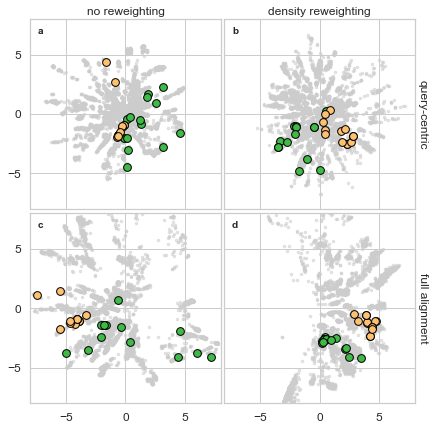

In [159]:
import seaborn as sns
sns.reset_orig()
import pandas as pd
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt

titles = ["query-centric","full alignment","no reweighting","density reweighting"]

fig, ax = plt.subplots(2, 2, figsize=(4*3/2,4*3/2), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.02, hspace=0.02, left=0.06, right=0.95, bottom=0.06, top=0.95)

ax[0,1].yaxis.set_label_position('right')
ax[0,1].set_ylabel(titles[0], rotation=270, labelpad=13, fontsize=12)
ax[1,1].yaxis.set_label_position('right')
ax[1,1].set_ylabel(titles[1], rotation=270, labelpad=13, fontsize=12)
ax[0,0].xaxis.set_label_position('top')
ax[0,0].set_xlabel(titles[2], fontsize=12)
ax[0,1].xaxis.set_label_position('top')
ax[0,1].set_xlabel(titles[3], fontsize=12)

labels = ['a', 'b', 'c', 'd']

blue = np.array([.13, .35, .61])
green = np.array([.25, .73, .28])
yellow = np.array([254,192,113])/255.0
purple = [.42, .16, .42]

for k, model in enumerate(models):
    
    i = k//2
    j = k%2

    embedded = embeddings[k]
    a1_zs = results['z'][k]['A1']
    a2_zs = results['z'][k]['A2']
    
    ax[i,j].axvline(x=0, color='0.95', zorder=0, lw=1)
    ax[i,j].axhline(y=0, color='0.95', zorder=0, lw=1)
    ax[i,j].plot(embedded[:,0],
               embedded[:,1],
               '.', color='0.8', markersize=5, alpha=0.5, zorder=1)
    ax[i,j].scatter(a1_zs[:,0], a1_zs[:,1], color=green, s=60, zorder=2, edgecolors='black', alpha=1.0)
    ax[i,j].scatter(a2_zs[:,0], a2_zs[:,1], color=yellow, s=60, zorder=2, edgecolors='black', alpha=1.0)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_xticks([-5, 0, 5])
    ax[i,j].set_yticks([-5, 0, 5])
    ax[i,j].set_xlim([-8,8])
    ax[i,j].set_ylim([-8,8])
    ax[i,j].set(aspect='equal')
    ax[i,j].tick_params(axis='both', which='major', labelsize=12)
    ax[i,j].text(0.04, 0.96, labels[k], transform=ax[i,j].transAxes, fontweight='bold', fontsize=10, verticalalignment='top')

plt.savefig('embeddings.pdf')

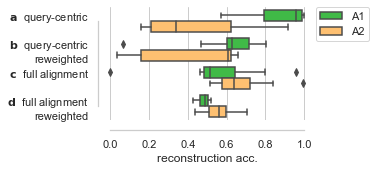

In [176]:
import seaborn as sns
sns.reset_orig()
import pandas as pd
sns.set_theme(style="whitegrid")
#sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="whitegrid")

colors = [green, yellow]
sns.set_palette(sns.color_palette(colors))


# def set_box_color(bp, color):
#     plt.setp(bp['boxes'], color=color)
#     plt.setp(bp['whiskers'], color=color)
#     plt.setp(bp['caps'], color=color)
#     plt.setp(bp['medians'], color=color)

#fig_observations = ["reconstruction acc.", "reconstruction acc. w. gaps", "gap fraction"]
#fig_observations = ["reconstruction acc.", "reconstruction acc. w. gaps"]
fig_observations = ["reconstruction acc."]

model_names = ['$\\bf{a}~$ query-centric\n', '$\\bf{b}~$ query-centric\nreweighted', '$\\bf{c}~$ full alignment\n', '$\\bf{d}~$ full alignment\nreweighted']

fig, ax = plt.subplots(len(fig_observations), 1, figsize=(5,len(fig_observations)*5/2), sharex=True, squeeze=False)
plt.subplots_adjust(hspace=0.30, left=0.25, bottom=0.25, right=0.8)
plt.xlim(-0.01, 1.01)

for i,observation in enumerate(fig_observations):

    plot_data = []
    for cls in ["A1", "A2"]:
        for j,(model,model_name) in enumerate(zip(models, model_names)):
            for result in results[observation][j][cls].squeeze():
                plot_data.append({observation: result,
                                  'model': model_name,
                                  'class': cls})
    plot_data = pd.DataFrame(plot_data)
    sns.boxplot(x=observation, y='model', hue='class', data=plot_data, ax=ax[i, 0], saturation=1)
    
    ax[i, 0].set_ylabel('')
    ax[i, 0].set_xticks(np.arange(0, 1.1, 0.2))
    sns.despine(offset=10, trim=True)
    
    legend = ax[i, 0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # set the linewidth of each legend object
    for legobj in legend.legendHandles:
        legobj.set_linewidth(1.5)
plt.savefig('reconstruction_accuracies.pdf')


# Interpolation between two proteins

In [274]:
# Select last model for further analysis
model = models[-1]
embedded = embeddings[-1]
a1_zs = results['z'][-1]['A1']
a2_zs = results['z'][-1]['A2']

# Create grid and calculate discretized version of manifold, so that geodesics can be calculated using
# graph algorithm
n_points = 100
z_grid = torch.stack([m.flatten() for m in torch.meshgrid(2*[torch.linspace(-10,10,n_points)])]).t()

from models.geoml.manifold import EmbeddedManifold, CubicSpline
from models.geoml.discretized_manifold import DiscretizedManifold
dm = DiscretizedManifold(model, z_grid.t().reshape(2,n_points,n_points), use_diagonals=True)

# Create grid for zoom-in
n_points_zoomin = 100
z_grid_zoomin = torch.stack([m.flatten() for m in torch.meshgrid([torch.linspace(-1,4,n_points_zoomin), 
                                                                  torch.linspace(-4,1,n_points_zoomin)])]).t()

# Calculate entropies at each grid point
recon = model.decode(z_grid_zoomin, as_probs=True)
d = torch.distributions.Categorical(probs=recon.permute(0,2,1))
entropy = d.entropy().sum(dim=-1)

[ 1.4070579 -2.53049  ] [ 3.195815  -1.0606525]


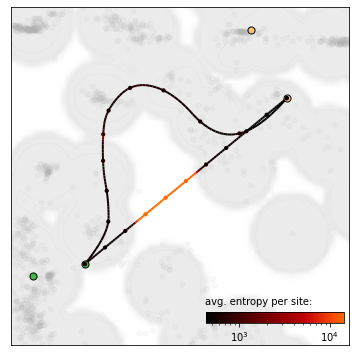

In [501]:
sns.reset_orig()
import matplotlib as mpl

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''helper function to use partial color maps'''
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

fig, ax = plt.subplots(figsize=(4.8,4.8))

cmap = truncate_colormap(plt.get_cmap('gray'), 0.90, 1.0)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99)

# Use entropy as background
plt.contourf(z_grid_zoomin[:,0].reshape(n_points, n_points),
             z_grid_zoomin[:,1].reshape(n_points, n_points),
             entropy.reshape(n_points, n_points).detach(), levels=50, cmap=cmap, alpha=0.8, zorder=1)

# Plot training points
plt.plot(embedded[:,0],
         embedded[:,1],
         '.', color='0.7', markersize=10, alpha=0.075, zorder=1)

# Plot class A1 and A2 points
ax.scatter(a1_zs[:,0], a1_zs[:,1], color=green, s=50, zorder=20, edgecolors='black')
ax.scatter(a2_zs[:,0], a2_zs[:,1], color=yellow, s=50, zorder=20, edgecolors='black')

ax.set_xlim([0.75, 3.75])
ax.set_ylim([-3.25, -0.25])

# Select two points that are reasonably close - to allow visual inspection of interpolant
p1_idx = 11
p2_idx = 0
p1 = a1_zs[p1_idx]
p2 = a2_zs[p2_idx]
print(p1, p2)

# Calculate interpolants
c = dm.connecting_geodesic(torch.tensor(p1).reshape(1,-1), torch.tensor(p2).reshape(1,-1), 
                           CubicSpline(torch.tensor(p1).reshape(1,-1), torch.tensor(p2).reshape(1,-1), num_nodes=10))
interpolant_geodesic = c(torch.linspace(0,1,101)).detach()
t = torch.linspace(0, 1, 101)[:,None]
interpolant_linear = (t*(p2-p1)[None,:]+p1)

# Calculate output distribution along interpolants
xdists_geodesic = model.decode(interpolant_geodesic, as_probs=True).detach()
xdists_linear = model.decode(interpolant_linear, as_probs=True).detach()

# Calculate entropy along interpolants
entropy_geodesic = torch.distributions.Categorical(probs=xdists_geodesic.permute(0,2,1)).entropy().sum(-1).detach()
entropy_linear = torch.distributions.Categorical(probs=xdists_linear.permute(0,2,1)).entropy().sum(-1).detach()

# Global Min/Max of entropy for color bar
entropy_min = min(entropy_geodesic.min(), entropy_linear.min())
entropy_max = max(entropy_geodesic.max(), entropy_linear.max())

# Indices at which interpolant will be inspected
idx = torch.linspace(0, 100, 11).long()

# Plot interpolant points
cmap = truncate_colormap(plt.get_cmap('gist_heat'), 0.0, 0.70)
ax.scatter(interpolant_linear[idx,0], interpolant_linear[idx,1], s=10, zorder=20, c=entropy_linear[idx], cmap=cmap, norm=mpl.colors.LogNorm(entropy_min, entropy_max))
ax.scatter(interpolant_geodesic[idx,0], interpolant_geodesic[idx,1], s=10, zorder=20, c=entropy_geodesic[idx], cmap=cmap, norm=mpl.colors.LogNorm(entropy_min, entropy_max))

# Plot interpolant curves - colored by entropy
from matplotlib.collections import LineCollection
segments_geodesic = np.stack([interpolant_geodesic[:-1], interpolant_geodesic[1:]]).swapaxes(1,0)
lc_geodesic = LineCollection(segments_geodesic, cmap=cmap, norm=mpl.colors.LogNorm(entropy_min, entropy_max), zorder=5)
lc_geodesic.set_array(entropy_geodesic)
lc_geodesic.set_linewidth(2)
line_geodesic = ax.add_collection(lc_geodesic)

segments_linear = np.stack([interpolant_linear[:-1], interpolant_linear[1:]]).swapaxes(1,0)
lc_linear = LineCollection(segments_linear, cmap=cmap, norm=mpl.colors.LogNorm(entropy_min, entropy_max), zorder=5)
lc_linear.set_array(entropy_linear)
lc_linear.set_linewidth(2)
line_line = ax.add_collection(lc_linear)

# Remove ticks and set color bar
plt.xticks([])
plt.yticks([])
ax.text(0.575, 0.12, "avg. entropy per site:", transform=ax.transAxes)
cbaxes = fig.add_axes([0.575, 0.075, 0.4, 0.03]) 
cb = fig.colorbar(line, cax = cbaxes, orientation='horizontal')  

plt.savefig('plot.svg')


# Entropy hotspots

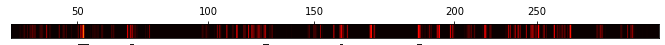

In [502]:
fig, ax = plt.subplots(figsize=(9,1))
plt.subplots_adjust(wspace=0.0, hspace=0.0, left=0.0, right=1.0, bottom=0.0, top=0.95)

# Calculate output distribution at start and end point
x_dist_p1 = p = np.average(xdists_geodesic[:5], axis=0)
x_dist_p2 = q = np.average(xdists_geodesic[-5:], axis=0)
#x_dist_p1 = p = model.decode(torch.from_numpy(p1), as_probs=True).detach().cpu().numpy()
#x_dist_p2 = q = model.decode(torch.from_numpy(p2), as_probs=True).detach().cpu().numpy()

# Map to original sequence if alignment indices are available
ticks = pd.Series(range(x_dist_p1.shape[-1]))
if results['idx_map'][-1]['A1'] is not None:
    
    a1_idx_maps = results['idx_map'][-1]['A1']
    a1_idx_map = a1_idx_maps[0]

    # Find indices back into original sequence
    TEM_1 = "MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW"
    TEM_1_offset = 3
    align2query = a1_idx_maps[0] + TEM_1_offset
    query2align = np.zeros(len(TEM_1)+TEM_1_offset, dtype='int')-1
    for i in range(x_dist_p1.shape[-1]):
        if query2align[align2query[i]] < 0:
            query2align[align2query[i]] = i
    
    # There is a mistake in the index from the alignment - due to removing of insertions in the "model sequence". 
    # This means indices are off. In this case, it causes a shift from around index 240
    align2query[query2align[240]:] += 1

    ticks = pd.Series(query2align)

# Focus on relevant part of alignment
range_min = 1500
range_max = 2650

# Setup ticks
ticks = (ticks[(ticks>=range_min) & (ticks<range_max)] - range_min).dropna()
ticks = ticks[ticks.index % 50 == 0]

# Calculate entropy contributions at each point
contributions = np.sum(p*(np.log(p) - np.log(q)), axis=0)

# Plot
ax.imshow(contributions[None,range_min:range_max], cmap=truncate_colormap(plt.get_cmap('hot'), 0.0, 0.7), aspect=25.)
ax.set_yticks([])
ax.set_xticks(ticks)
ax.set_xticklabels(ticks.index, fontsize=10)
ax.xaxis.tick_top()
plt.ylim(-0.5,0.5)

# Select range of interest for subsequent highlighting in logos
ranges = [(1619, 1638), (1712, 1718), (1947, 1958), (2084, 2090), (2220, 2230)]

for xmin, xmax in ranges:
    plt.hlines(-1, xmin=xmin-range_min, xmax=xmax-range_min, clip_on=False, lw=2)

plt.savefig('contributions_heatmap.svg')

In [482]:
try:
    import logomaker
except:
    !pip install logomaker
    import logomaker

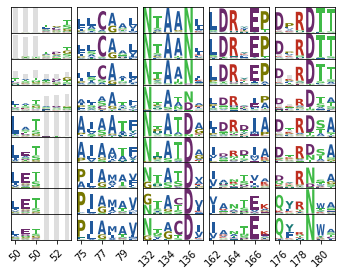

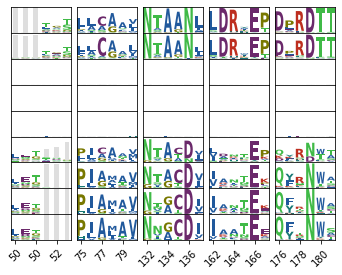

In [483]:
def plot_logo(x_dist, index, ax):

    x_dist_entropy = x_dist * (np.log(len(aa1))/np.log(2) - ( - (torch.log(x_dist)/np.log(2) * x_dist).sum(dim=1))).unsqueeze(1)

    import pandas as pd
    df = pd.DataFrame(x_dist_entropy.cpu().numpy(), columns=list("ACDEFGHIKLMNPQRSTVWYX.-"), index=index)

    NajafabadiEtAl2017 = {
        'D': [.42, .16, .42],
        'E': [.42, .16, .42],
        'C': [.42, .16, .42],
        'P': [.47, .47, 0.0],
        'G': [.47, .47, 0.0],
        'M': [.13, .35, .61],
        'I': [.13, .35, .61],
        'W': [.13, .35, .61],
        'A': [.13, .35, .61],
        'L': [.13, .35, .61],
        'F': [.13, .35, .61],
        'V': [.13, .35, .61],
        'N': [.25, .73, .28],
        'T': [.25, .73, .28],
        'S': [.25, .73, .28],
        'Q': [.25, .73, .28],
        'R': [.74, .18, .12],
        'K': [.74, .18, .12],
        'H': [.09, .47, .46],
        'Y': [.09, .47, .46],
        '-': [0.87, 0.87, 0.87],
        '.': [0.87, 0.87, 0.87],
        'X': [0.87, 0.87, 0.87]
    }


    logo = logomaker.Logo(df, width=0.8, 
                        color_scheme=NajafabadiEtAl2017, ax=ax)


def plot_logo_array(xdists_smoothed, ranges, out_filename):

    fig, ax = plt.subplots(xdists_smoothed.shape[0],len(ranges), sharey=True, sharex='col', 
                           figsize=(5,0.4*xdists_smoothed.shape[0]))
    plt.subplots_adjust(wspace=0.1, hspace=0.0, left=0.05, right=0.95, bottom=0.10, top=1.0)

    for j, (xmin, xmax) in enumerate(ranges):
        x_dists = xdists_smoothed[:,xmin:xmax,:]
        index = np.arange(xmin, xmax)

        non_empty_columns = np.any(np.argmax(x_dists, axis=-1) <= 19, axis=0)
        x_dists = x_dists[:,non_empty_columns]
        index = index[non_empty_columns]

        for i in range(x_dists.shape[0]):
            plot_logo(torch.from_numpy(x_dists[i]), index=range(x_dists[i].shape[0]), ax=ax[i,j])
            ax[i,j].yaxis.set_ticks([])
            ax[i,j].xaxis.set_ticks(range(x_dists[i].shape[0])[::2])
            # ax[i,j].xaxis.set_ticks(range(x_dists[i].shape[0])[::1])
            ax[i,j].set_xticklabels([align2query[i] for i in index][::2], fontsize=10, rotation=45)
            # ax[i,j].set_xticklabels([align2query[i] for i in index][::1], fontsize=10, rotation=45)
    plt.savefig(out_filename)

xdists_geodesic_smoothed = np.array([np.average(xdists_geodesic[i-4:i+5], axis=0) for i in idx[1:-1]]).swapaxes(2,1)
xdists_linear_smoothed = np.array([np.average(xdists_linear[i-4:i+5], axis=0) for i in idx[1:-1]]).swapaxes(2,1)

plot_logo_array(xdists_geodesic_smoothed, ranges, 'logo_trace.svg')
plot_logo_array(xdists_linear_smoothed, ranges, 'logo_trace_linear.svg')